In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [2]:
# connect to sql database 
conn=mysql.connector.connect(
    host='localhost',
    user='root',
    password='Himanshu@9325',
    database='churn_db'
)

In [3]:
query="SELECT * FROM customers;"
df=pd.read_sql(query,conn)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       500 non-null    int64  
 1   gender            500 non-null    object 
 2   age               500 non-null    int64  
 3   tenure            500 non-null    int64  
 4   balance           500 non-null    float64
 5   products_number   500 non-null    int64  
 6   has_credit_card   500 non-null    int64  
 7   is_active_member  500 non-null    int64  
 8   estimated_salary  500 non-null    float64
 9   churn             500 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 39.2+ KB


In [5]:
df.drop(columns=['customer_id'],inplace=True)

In [6]:
df["gender"]=df["gender"].map({"Male":0,"Female":0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            500 non-null    int64  
 1   age               500 non-null    int64  
 2   tenure            500 non-null    int64  
 3   balance           500 non-null    float64
 4   products_number   500 non-null    int64  
 5   has_credit_card   500 non-null    int64  
 6   is_active_member  500 non-null    int64  
 7   estimated_salary  500 non-null    float64
 8   churn             500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.3 KB


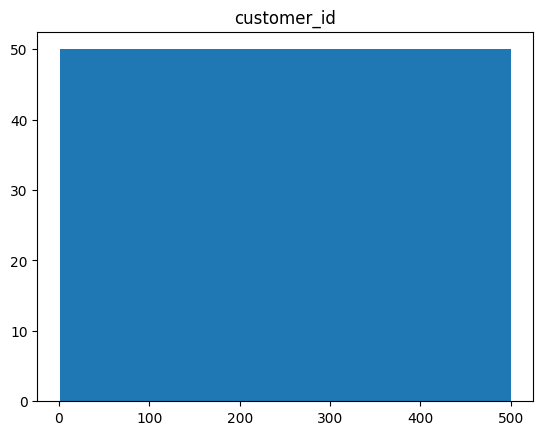

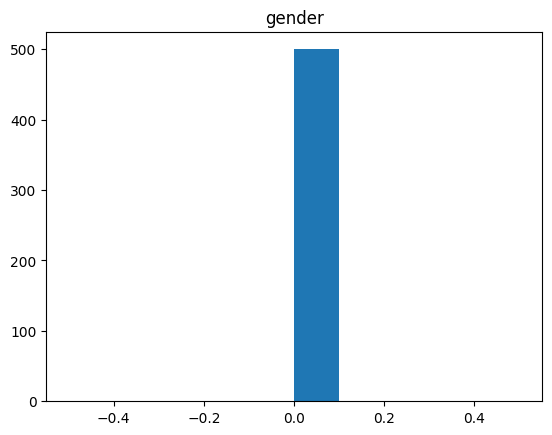

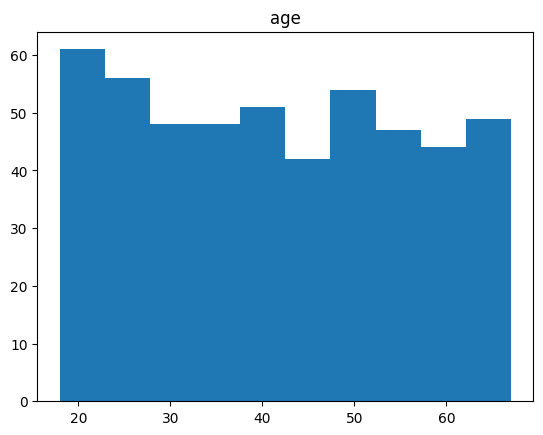

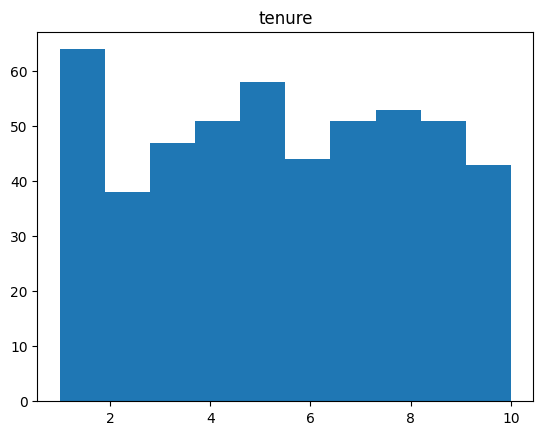

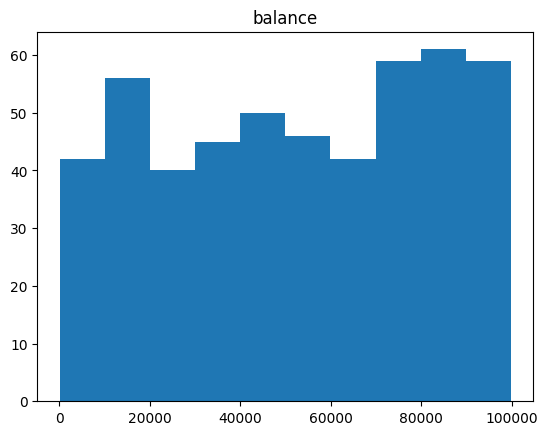

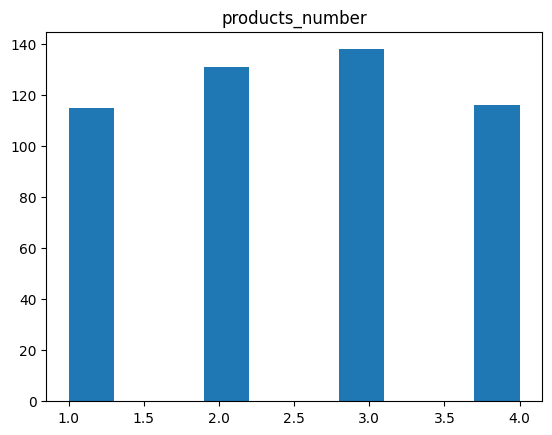

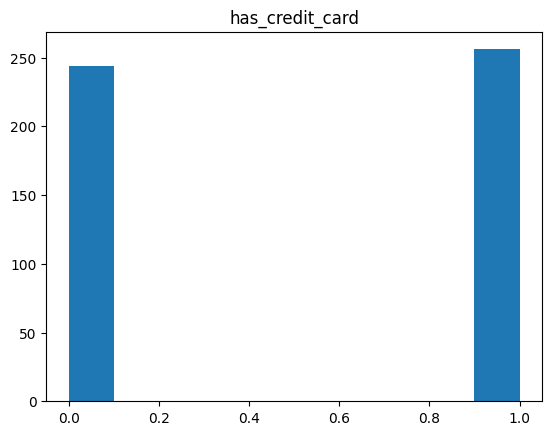

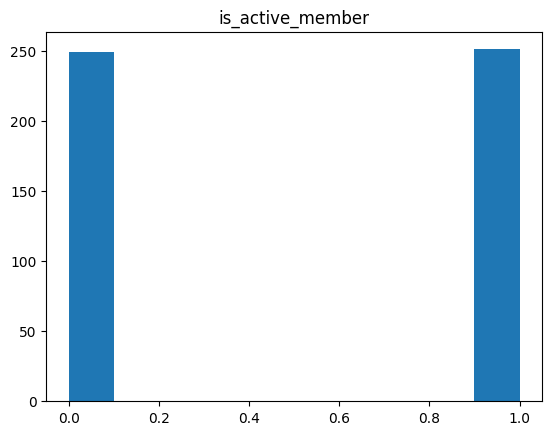

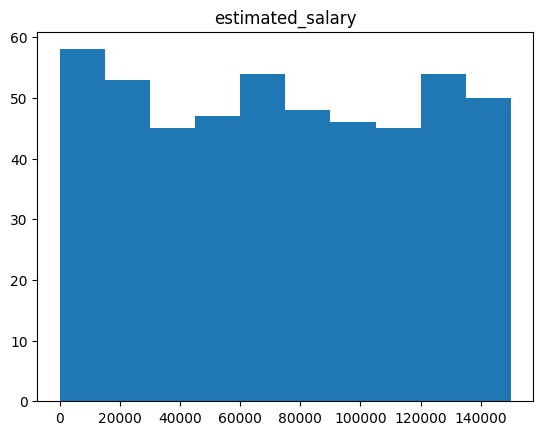

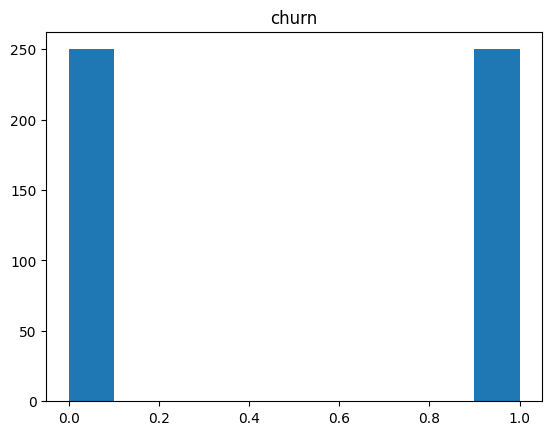

In [36]:
# EDA HW

# df.info()

for col in df.columns:
    plt.Figure(figsize=(10,5))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

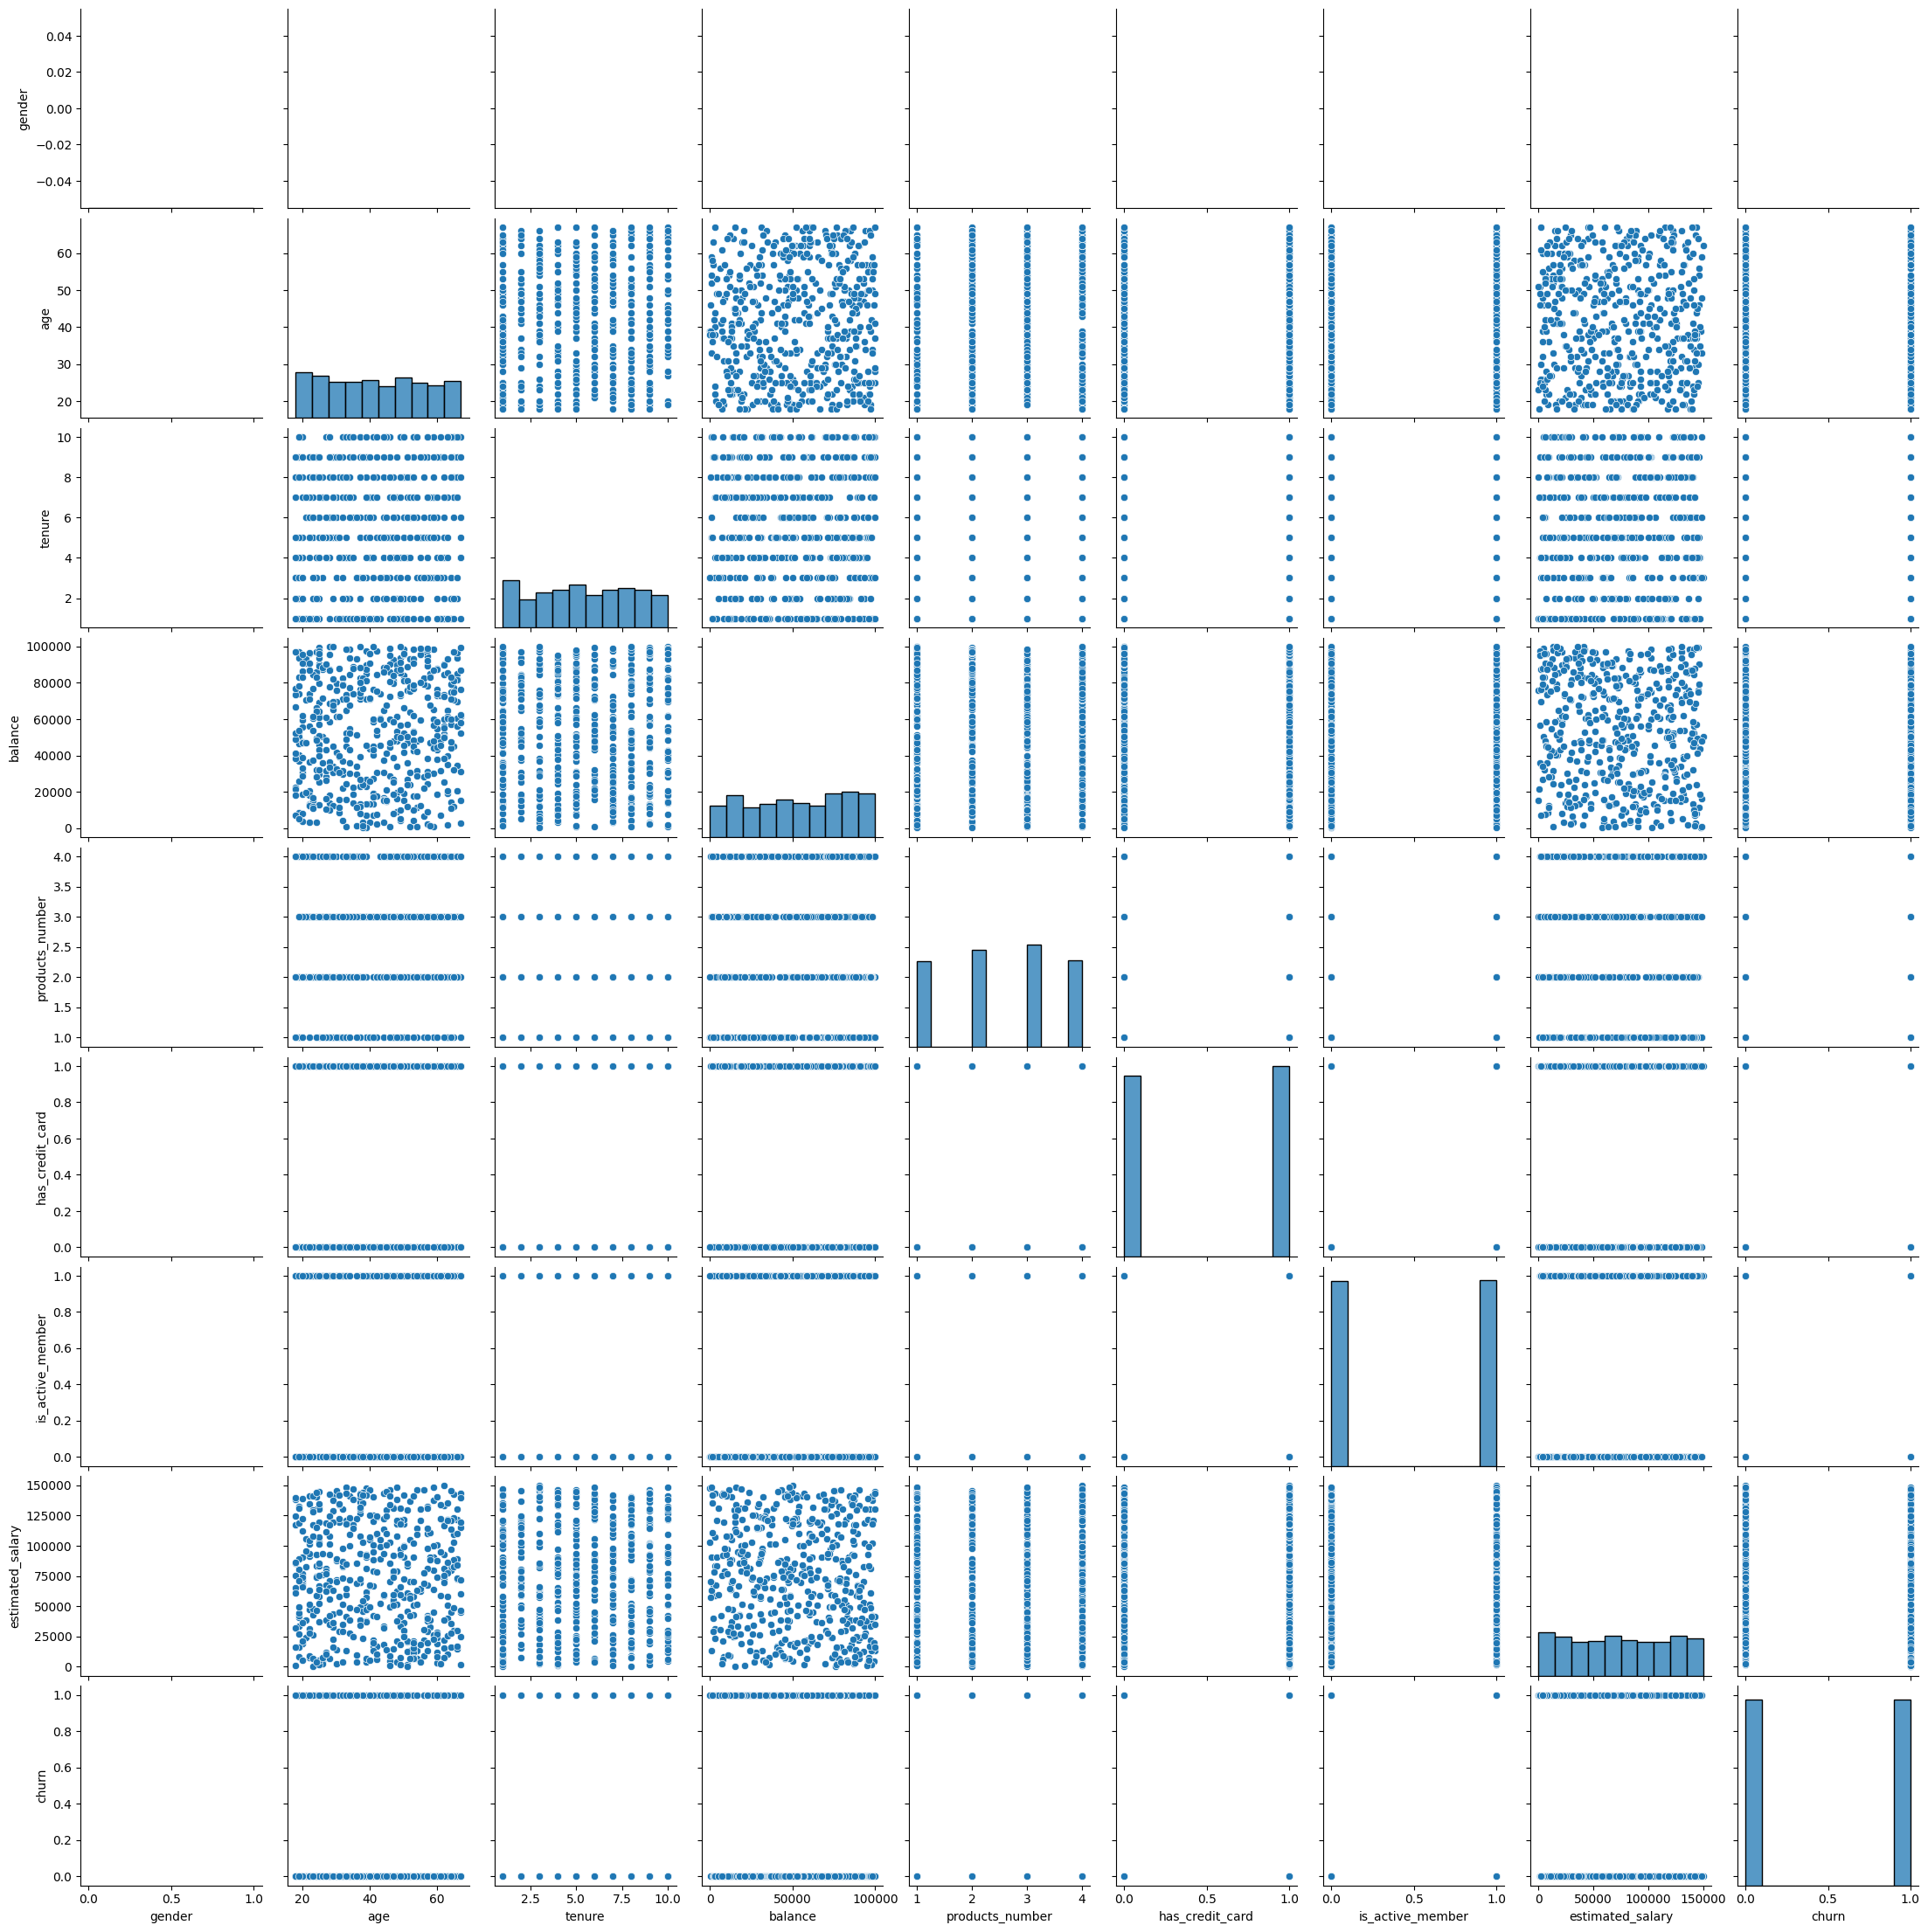

In [30]:
plt.Figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

In [7]:
# model Building
X=df.drop(columns="churn")
Y=df["churn"]

In [8]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()
model.fit(X_train,Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
y_pred=model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
cr=classification_report(Y_test,y_pred)
accu=accuracy_score(Y_test,y_pred)

In [14]:
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n",cr)
print("\nAccuracy Score:",accu)

Confusion Matrix:
 [[32 37]
 [43 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.46      0.44        69
           1       0.51      0.47      0.49        81

    accuracy                           0.47       150
   macro avg       0.47      0.47      0.47       150
weighted avg       0.47      0.47      0.47       150


Accuracy Score: 0.4666666666666667


In [15]:
# save model
import pickle
with open("model.pkl","wb") as f:
    pickle.dump((model,scaler),f)
print("Model saved successfully.")

Model saved successfully.
